<a href="https://colab.research.google.com/github/gongx030/seatac_manuscript/blob/main/OSK_RNA_and_NOR_NFR_sf6ef.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# The notebook run Differential expression analysis between MEFs and D7 MEFs post OSK induction and lists genes with regions going from NFR to NOR and are significantly down at D7.

In [1]:
start_time0 <- Sys.time()
options(max.print=1000)

### Install external packages

In [2]:
system('apt-get -q install libgsl-dev', intern = TRUE)

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libgsl23 libgslcblas0"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  gsl-ref-psdoc | gsl-doc-pdf | gsl-doc-info | gsl-ref-html"                                                           

In [3]:
system('apt-get install libcairo2-dev', intern = TRUE) # for Cairo package that is required by ComplexHeatmap package

[1] "Reading package lists..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      
 [2] "Building dependency tree..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
 [3] "Reading state information..."                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
 [4] "The following additional packages will be installed:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          
 [5] "  libcairo-script-interpreter2 libpixman-1-dev libxcb-shm0-dev"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                
 [6] "Suggested packages:"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           
 [7] "  libcairo2-doc"                                                                                                       

## Install R packages

In [4]:
install.packages('BiocManager')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [5]:
required_packages <- c(
  'devtools',
  'DESeq2',
  'org.Mm.eg.db',
  'clusterProfiler',
  'TxDb.Mmusculus.UCSC.mm10.knownGene',
  'motifmatchr',
  'BSgenome.Mmusculus.UCSC.mm10'
)

In [6]:
missing_packages <- required_packages[!required_packages %in% rownames(installed.packages())]
if (length(missing_packages) > 0){
    BiocManager::install(missing_packages)
}

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.3 (2022-03-10)

Installing package(s) 'BiocVersion', 'DESeq2', 'org.Mm.eg.db',
  'clusterProfiler', 'TxDb.Mmusculus.UCSC.mm10.knownGene', 'motifmatchr',
  'BSgenome.Mmusculus.UCSC.mm10'

also installing the dependencies ‘formatR’, ‘gridGraphics’, ‘tweenr’, ‘polyclip’, ‘RcppEigen’, ‘lazyeval’, ‘rjson’, ‘filelock’, ‘pracma’, ‘R.oo’, ‘R.methodsS3’, ‘lambda.r’, ‘futile.options’, ‘xtable’, ‘plogr’, ‘png’, ‘gridExtra’, ‘fastmatch’, ‘ggfun’, ‘ggplotify’, ‘patchwork’, ‘ggforce’, ‘ggrepel’, ‘viridis’, ‘tidygraph’, ‘graphlayouts’, ‘ape’, ‘tidytree’, ‘treeio’, ‘GenomicAlignments’, ‘restfulr’, ‘BiocFileCache’, ‘poweRlaw’, ‘R.utils’, ‘XVector’, ‘MatrixGenerics’, ‘DelayedArray’, ‘futile.logger’, ‘snow’, ‘BH’, ‘annotate’, ‘RSQLite’, ‘KEGGREST’, ‘DO.db’, ‘fgsea’, ‘reshape2’, ‘aplot’, ‘ggr

# Download packages from Github

In [7]:
devtools::install_github("GreenleafLab/chromVARmotifs")

vctrs        (0.4.0 -> 0.4.1) [CRAN]
blob         (1.2.2 -> 1.2.3) [CRAN]
RColorBrewer (1.1-2 -> 1.1-3) [CRAN]
scales       (1.1.1 -> 1.2.0) [CRAN]


Installing 4 packages: vctrs, blob, RColorBrewer, scales

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpB0zzEJ/remotes565176349d/GreenleafLab-chromVARmotifs-38bed55/DESCRIPTION’ ... OK
* preparing ‘chromVARmotifs’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘chromVARmotifs_0.2.0.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [8]:
devtools::install_github("GuangchuangYu/ChIPseeker")

enrichplot   (1.14.2 -> d11b60bb6...) [GitHub]
TxDb.Hsap... (NA     -> 3.2.2       ) [CRAN]
plotrix      (NA     -> 3.8-2       ) [CRAN]
gplots       (NA     -> 3.1.1       ) [CRAN]


Installing 3 packages: TxDb.Hsapiens.UCSC.hg19.knownGene, plotrix, gplots

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)





* checking for file ‘/tmp/RtmpB0zzEJ/remotes563a87cf36/GuangchuangYu-enrichplot-d11b60b/DESCRIPTION’ ... OK
* preparing ‘enrichplot’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* building ‘enrichplot_1.13.1.992.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



* checking for file ‘/tmp/RtmpB0zzEJ/remotes5610c4fa2f/YuLab-SMU-ChIPseeker-5945269/DESCRIPTION’ ... OK
* preparing ‘ChIPseeker’:
* checking DESCRIPTION meta-information ... OK
* checking for LF line-endings in source and make files and shell scripts
* checking for empty or unneeded directories
* looking to see if a ‘data/datalist’ file should be added
* building ‘ChIPseeker_1.31.4.tar.gz’



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



## Load R packages

In [9]:
library(tidyr)
library(dplyr)
library(ggplot2) # colorRamp2
library(parallel)
library(DESeq2)
library(ChIPseeker)
library(clusterProfiler)
library(TxDb.Mmusculus.UCSC.mm10.knownGene)
library(org.Mm.eg.db)
library(motifmatchr)
library(chromVARmotifs)
library(BSgenome.Mmusculus.UCSC.mm10)
library(data.table)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:dplyr’:

    combine, intersect, setdiff, union


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min



Attaching package

# Read regions from SeATAC for the putative OSK motifs

In [10]:
tab <- read.table('https://s3.msi.umn.edu/gongx030/projects/seatac_project/config/seatac_OSKM/results.tsv', sep = '\t', header = TRUE)

In [11]:
mef <- read.table(tab[tab$vae_latent == 5,]$remote_output_file, header = FALSE, sep = '\t')

In [12]:
colnames(mef) <- c('seqnames','start','end','width','strand','pvalue_z','padj','nucleosome_treatment','nucleosome_control','log_ratio')

In [13]:
mef <- GRanges(mef)

In [14]:
sprintf('number of motif-centric regions: %s', length(mef)) %>% message()

number of motif-centric regions: 282789



In [15]:
is_signif <- mef$padj < 0.05
sprintf('# of significantly differential V-plots called by SeATAC: %d', sum(is_signif)) %>% message()

# of significantly differential V-plots called by SeATAC: 19603



#OSK individual motifs

In [16]:
osk_dat <- read.table('https://s3.msi.umn.edu/dsouz072/datasets/dataset=seatac_file_version=20200209a/Seatac_dataset.tsv', header = TRUE, sep = '\t')
head(osk_dat)
osk_bam <- osk_dat[grepl('https://s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/', osk_dat$BAM),]
osk <- osk_bam[grepl('OSK-D0-rep|OSK-D1-rep|OSK-D7-rep|_mES-OSK-|MEF-rep1|_ESCs-rep1|_iPS-rep1', osk_bam$BAM),]

ARGS <- list(
  bin_size = 5L,
  fragment_size_range_max = 640L,
  fragment_size_interval = 10L,
  window_size = 1000L,
  heatmap_window_size = 2000L,
  block_size = 640L,
  sliding_step = 20L,
  min_reads = 5L,
  step_size = 200L,
  
  vae_num_peaks = 5000L,
  vae_latent = c(10L),
  vae_filters0 = c(128L),
  vae_filters = c(32L),
  vae_downsample_layers = 4L,
  vae_upsample_layers = 4L,
  vae_base_learning_rate = c(1e-2),
  vae_epochs = 200L,
  vae_beta_schedule_method = c('constant'),
  vae_beta0 = 1,
  vae_batch_size = c(128L),
  vae_warmup_ratio = 0.1,
  
  target_width = 100L,
  min_test_reads = 1L,
  max_test_reads = 10L,
  center_width = 100L # the center width
)

gr_all <- lapply(as.character(osk$BED), function(bed_file){
  peaks <- read.table(bed_file, header = FALSE, sep = '\t')
  peaks <- GRanges(seqnames = peaks[, 1], range = IRanges(start = peaks[, 2], end = peaks[, 3]))
  peaks <- resize(peaks, fix = 'center', width = ARGS[['step_size']])
  peaks
}) %>%
  GRangesList() %>%
  coverage() %>%
  IRanges::slice(lower = 1, rangesOnly = TRUE) %>%
  GRanges() %>%
  resize(fix = 'center', width = ARGS[['window_size']])
gr_all <- gr_all[!seqnames(gr_all) %in% c('chrM', 'chrY')]



data('homer_pwms')



gr_oct4 <- matchMotifs(homer_pwms["Oct4(POU,Homeobox)/mES-Oct4-ChIP-Seq(GSE11431)/Homer"], gr_all, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')
gr_sox2 <- matchMotifs(homer_pwms["Sox2(HMG)/mES-Sox2-ChIP-Seq(GSE11431)/Homer"], gr_all, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')
gr_klf4 <- matchMotifs(homer_pwms["Klf4(Zf)/mES-Klf4-ChIP-Seq(GSE11431)/Homer"], gr_all, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

,BAM,BED,Nucleoatac,Genome
,<chr>,<chr>,<chr>,<chr>
1,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Baf_rep1.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Baf_rep1_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Baf_rep1.nucleoatac_signal.smooth.bw,hg19
2,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Baf_rep2.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Baf_rep2_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Baf_rep2.nucleoatac_signal.smooth.bw,hg19
3,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Ctrl_rep1.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Ctrl_rep1_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Ctrl_rep1.nucleoatac_signal.smooth.bw,hg19
4,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Ctrl_rep2.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Ctrl_rep2_summits.bed,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Baf_version=20200129a/Ctrl_rep2.nucleoatac_signal.smooth.bw,hg19
5,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_summits.bed,NA,mm10
6,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_rtTA_B1_rep1.dedup.bam,https://s3.msi.umn.edu/dsouz072/datasets/dataset=Ascl1_version=20200128a/MEF_rtTA_B1_rep1_summits.bed,NA,mm10


In [17]:
gr_oct4 <- matchMotifs(homer_pwms["Oct4(POU,Homeobox)/mES-Oct4-ChIP-Seq(GSE11431)/Homer"], mef, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')
gr_sox2 <- matchMotifs(homer_pwms["Sox2(HMG)/mES-Sox2-ChIP-Seq(GSE11431)/Homer"], mef, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')
gr_klf4 <- matchMotifs(homer_pwms["Klf4(Zf)/mES-Klf4-ChIP-Seq(GSE11431)/Homer"], mef, genome = BSgenome.Mmusculus.UCSC.mm10, out = 'positions')[[1]] %>%
  resize(width = ARGS[['block_size']], fix = 'center')

In [18]:
mef_oct4 <- subsetByOverlaps(mef, gr_oct4)
mef_sox2 <- subsetByOverlaps(mef, gr_sox2)
mef_klf4 <- subsetByOverlaps(mef, gr_klf4)

In [19]:
osk_gr <- list(oct4 = mef_oct4, sox2 = mef_sox2, klf4 = mef_klf4)

## Read bulk RNA-seq of MEF reprogramming

In [20]:
remote_res <- c(rna = 'https://s3.msi.umn.edu/dsouz072/datasets/dataset=iPSC_reprogramming_version=20200208a/GSE93027_RNAseq_tag_count.tsv.gz')
for (f in remote_res){
  system(sprintf('wget -cx %s', f))
}
rna <- gsub('https://', './', remote_res)

In [21]:
bulk <- read.table(gzfile(rna[['rna']]), header = TRUE, sep = '\t')

## Assigning gene symbol to Ensembl gene ID

In [22]:
t2g_dat <- read.table('https://s3.msi.umn.edu/dsouz072/datasets/dataset=Foxk1_version=20191130a/transcripts_to_genes.txt', sep = '\t')

In [23]:
colnames(t2g_dat) <- c('ensembl_transcript', 'ensembl_gene', 'gene_name')
head(t2g_dat)

,ensembl_transcript,ensembl_gene,gene_name
,<chr>,<chr>,<chr>
1,ENSMUST00000193812.1,ENSMUSG00000102693.1,4933401J01Rik
2,ENSMUST00000082908.1,ENSMUSG00000064842.1,Gm26206
3,ENSMUST00000162897.1,ENSMUSG00000051951.5,Xkr4
4,ENSMUST00000159265.1,ENSMUSG00000051951.5,Xkr4
5,ENSMUST00000070533.4,ENSMUSG00000051951.5,Xkr4
6,ENSMUST00000192857.1,ENSMUSG00000102851.1,Gm18956


In [24]:
t2g_dat$ensg <- gsub('\\.[0-9]+','', t2g_dat$ensembl_gene)

In [25]:
gene_dat <- data.frame(ensg = bulk$X)

In [26]:
gene_dat$gene_name <-t2g_dat$gene_name[match(gene_dat$ensg, t2g_dat$ensg)]

In [27]:
bulk$X <- gene_dat$gene_name[match(bulk$X, gene_dat$ensg)]

### Summarized experiment file with count data

In [28]:
se_bulk <- SummarizedExperiment(list(counts = as.matrix(bulk[!colnames(bulk) %in% c('X')])), 
  rowData = DataFrame(SYMBOL = bulk$X),
  colData = DataFrame(id = colnames(bulk[!colnames(bulk) %in% c('X')])))

In [29]:
se_bulk$group <- gsub('\\.','_', se_bulk$id)
se_bulk$group <- gsub('_rep[0-9]','', se_bulk$group)

In [30]:
se_bulk

class: SummarizedExperiment 
dim: 18198 26 
metadata(0):
assays(1): counts
rownames: NULL
rowData names(1): SYMBOL
colnames(26): ESCs.rep1 ESCs.rep2 ... OSK.shSap30.D7.rep1
  OSK.shSap30.D7.rep2
colData names(2): id group

#Deseq2

## Find  DE genes between MEF and D7 cells post induction

In [31]:
se_bulk <- DESeqDataSet(se_bulk, design = ~ group)
se_bulk <- estimateSizeFactors(se_bulk)
se_bulk <- DESeq(se_bulk)
assays(se_bulk)$normalized_counts <- log2(counts(se_bulk, normalized = TRUE) + 1)
res <- results(se_bulk, contrast = c('group', 'OKS_D7', 'MEF'))

Warning message in DESeqDataSet(se_bulk, design = ~group):
“some variables in design formula are characters, converting to factors”
using pre-existing size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

-- note: fitType='parametric', but the dispersion trend was not well captured by the
   function: y = a/x + b, and a local regression fit was automatically substituted.
   specify fitType='local' or 'mean' to avoid this message next time.

final dispersion estimates

fitting model and testing



In [32]:
res$SYMBOL <- rowData(se_bulk)$SYMBOL

In [33]:
summary(res)


out of 17950 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)       : 3548, 20%
LFC < 0 (down)     : 3248, 18%
outliers [1]       : 0, 0%
low counts [2]     : 1391, 7.7%
(mean count < 2)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



# NFR -> NOR 
(MEF to D7 MEFs post OSK induction)

In [34]:
down <- lapply(osk_gr, function(o){
  o[o$log_ratio > 0.1 & o$padj < 0.05]
})

In [35]:
anno <- lapply(down, function(d){
  annotatePeak(d, tssRegion = c(-5000, 1000),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')
})

>> preparing features information...		 2022-04-15 09:18:38 PM 
>> identifying nearest features...		 2022-04-15 09:18:39 PM 
>> calculating distance from peak to TSS...	 2022-04-15 09:18:39 PM 
>> assigning genomic annotation...		 2022-04-15 09:18:39 PM 
>> adding gene annotation...			 2022-04-15 09:18:56 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-15 09:18:56 PM 
>> done...					 2022-04-15 09:18:56 PM 
>> preparing features information...		 2022-04-15 09:18:56 PM 
>> identifying nearest features...		 2022-04-15 09:18:56 PM 
>> calculating distance from peak to TSS...	 2022-04-15 09:18:57 PM 
>> assigning genomic annotation...		 2022-04-15 09:18:57 PM 
>> adding gene annotation...			 2022-04-15 09:18:59 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-15 09:18:59 PM 
>> done...					 2022-04-15 09:18:59 PM 
>> preparing features information...		 2022-04-15 09:18:59 PM 
>> identifying nearest features...		 2022-04-15 09:18:59 PM 
>> calculating distance from peak to TSS...	 2022-04-15 09:19:00 PM 
>> assigning genomic annotation...		 2022-04-15 09:19:00 PM 
>> adding gene annotation...			 2022-04-15 09:19:03 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-15 09:19:03 PM 
>> done...					 2022-04-15 09:19:03 PM 


In [36]:
dat <- lapply(anno, function(a){
  data.frame(a)
})

In [37]:
for (i in 1:length(dat)){
dat[[i]]$log2FC <- res$log2FoldChange[match(dat[[i]]$SYMBOL, res$SYMBOL)]
}

In [38]:
for (i in 1:length(dat)){
dat[[i]]$padj_RNA <- res$padj[match(dat[[i]]$SYMBOL, res$SYMBOL)]
}

In [39]:
for (i in 1:length(dat)){
  dat[[i]]$group <- 'NFR_NOR'
}

#NOR -> NFR
(MEF to D7 MEFs post OSK induction)

In [40]:
up <- lapply(osk_gr, function(o){
  o[o$log_ratio < -0.1 & o$padj < 0.05]
  })

In [41]:
anno_up <- lapply(up, function(u){
  annotatePeak(u, tssRegion = c(-5000, 1000),TxDb = TxDb.Mmusculus.UCSC.mm10.knownGene,
        annoDb = 'org.Mm.eg.db')
})

>> preparing features information...		 2022-04-15 09:19:03 PM 
>> identifying nearest features...		 2022-04-15 09:19:03 PM 
>> calculating distance from peak to TSS...	 2022-04-15 09:19:03 PM 
>> assigning genomic annotation...		 2022-04-15 09:19:03 PM 
>> adding gene annotation...			 2022-04-15 09:19:06 PM 


'select()' returned 1:1 mapping between keys and columns



>> assigning chromosome lengths			 2022-04-15 09:19:06 PM 
>> done...					 2022-04-15 09:19:06 PM 
>> preparing features information...		 2022-04-15 09:19:06 PM 
>> identifying nearest features...		 2022-04-15 09:19:06 PM 
>> calculating distance from peak to TSS...	 2022-04-15 09:19:07 PM 
>> assigning genomic annotation...		 2022-04-15 09:19:07 PM 
>> adding gene annotation...			 2022-04-15 09:19:10 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-15 09:19:10 PM 
>> done...					 2022-04-15 09:19:10 PM 
>> preparing features information...		 2022-04-15 09:19:10 PM 
>> identifying nearest features...		 2022-04-15 09:19:10 PM 
>> calculating distance from peak to TSS...	 2022-04-15 09:19:10 PM 
>> assigning genomic annotation...		 2022-04-15 09:19:10 PM 
>> adding gene annotation...			 2022-04-15 09:19:13 PM 


'select()' returned 1:many mapping between keys and columns



>> assigning chromosome lengths			 2022-04-15 09:19:13 PM 
>> done...					 2022-04-15 09:19:13 PM 


In [42]:
dat_up <- lapply(anno_up, function(a){
  data.frame(a)
})

In [43]:
for (i in 1:length(dat_up)){
  dat_up[[i]]$log2FC <- res$log2FoldChange[match(dat_up[[i]]$SYMBOL, res$SYMBOL)]
}

In [44]:
for (i in 1:length(dat_up)){
dat_up[[i]]$padj_RNA <- res$padj[match(dat_up[[i]]$SYMBOL, res$SYMBOL)]
}

In [45]:
for (i in 1:length(dat_up)){
  dat_up[[i]]$group <- 'NOR_NFR'
}


#Combined bar plots for Down, Up and NoChange genes

In [46]:
df_oct4 <- rbind(dat$oct4, dat_up$oct4)
df_oct4$TF <- 'Oct4'
df_sox2 <- rbind(dat$sox2, dat_up$sox2)
df_sox2$TF <- 'Sox2'
df_klf4 <- rbind(dat$klf4, dat_up$klf4)
df_klf4$TF <- 'Klf4'

In [47]:
df_promoter_oct4 <- df_oct4[grepl('Promoter',df_oct4$annotation),]

In [48]:
o <- df_promoter_oct4 %>%
  filter(!is.na(padj_RNA)) %>%
  mutate(  Direction = case_when(
    padj_RNA < 0.05 & log2FC < 0 ~ 'Down',
    padj_RNA < 0.05 & log2FC > 0 ~ 'Up',
    padj_RNA > 0.05 ~ 'NC'
    )
  ) %>% 
  group_by(group) %>%
  summarize(Total = n(),
  across()
  ) %>%
  group_by(group, Direction, Total) %>%
  summarise(Count = n()) %>%
  mutate(Percent = 100*Count/Total) %>%
  ggplot(aes(x = Direction, y = Percent, fill = group)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  scale_fill_manual(values = c('indianred1','black')) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  panel.background = element_blank(), axis.line = element_line(colour = "black"))

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'group', 'Direction'. You can override
using the `.groups` argument.


In [49]:
df_promoter_sox2 <- df_sox2[grepl('Promoter',df_sox2$annotation),]

In [50]:
s <- df_promoter_sox2 %>%
  filter(!is.na(padj_RNA)) %>%
  mutate(  Direction = case_when(
    padj_RNA < 0.05 & log2FC < 0 ~ 'Down',
    padj_RNA < 0.05 & log2FC > 0 ~ 'Up',
    padj_RNA > 0.05 ~ 'NC'
    )
  ) %>% 
  group_by(group) %>%
  summarize(Total = n(),
  across()
  ) %>%
  group_by(group, Direction, Total) %>%
  summarise(Count = n()) %>%
  mutate(Percent = 100*Count/Total) %>%
  ggplot(aes(x = Direction, y = Percent, fill = group)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  scale_fill_manual(values = c('indianred1','black')) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  panel.background = element_blank(), axis.line = element_line(colour = "black"))

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'group', 'Direction'. You can override
using the `.groups` argument.


In [51]:
df_promoter_klf4 <- df_klf4[grepl('Promoter',df_klf4$annotation),]

In [52]:
k <- df_promoter_klf4 %>%
  filter(!is.na(padj_RNA)) %>%
  mutate(  Direction = case_when(
    padj_RNA < 0.05 & log2FC < 0 ~ 'Down',
    padj_RNA < 0.05 & log2FC > 0 ~ 'Up',
    padj_RNA > 0.05 ~ 'NC'
    )
  ) %>% 
  group_by(group) %>%
  summarize(Total = n(),
  across()
  ) %>%
  group_by(group, Direction, Total) %>%
  summarise(Count = n()) %>%
  mutate(Percent = 100*Count/Total) %>%
  ggplot(aes(x = Direction, y = Percent, fill = group)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  scale_fill_manual(values = c('indianred1','black')) +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
  panel.background = element_blank(), axis.line = element_line(colour = "black"))

`summarise()` has grouped output by 'group'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'group', 'Direction'. You can override
using the `.groups` argument.


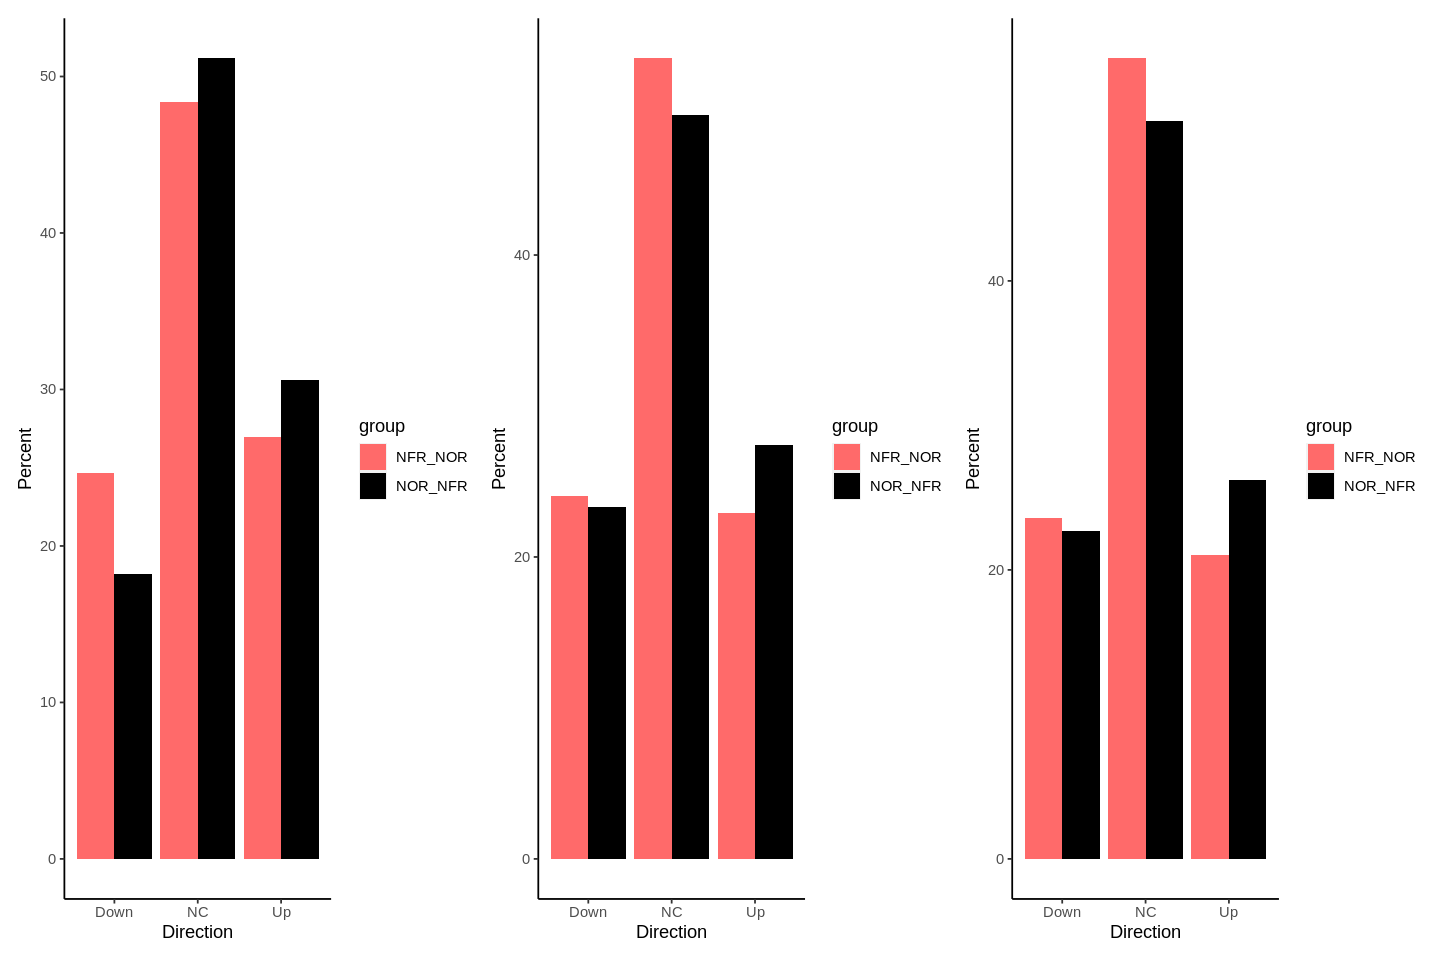

In [53]:
options(repr.plot.width = 12, repr.plot.height = 8)
o+s+k

#Box plots with replicates to show the normalized counts calculated by DESeq2

In [54]:
mat <- counts(se_bulk,normalized=TRUE)

In [55]:
colnames(mat) <- se_bulk$group

In [56]:
rownames(mat) <- rowData(se_bulk)$SYMBOL

In [57]:
genes_selected <- data.frame(t(mat[rownames(mat) %in% c('Maf','Smad3'),]))

In [58]:
genes_selected$group <- se_bulk$group

In [59]:
unique(genes_selected$group)

[1] ESCs           MEF            OKS_D0         OKS_D1         OKS_D3        
 [6] OKS_D5         OKS_D7         OKS_cJun_D0    OKS_cJun_D1    OKS_cJun_D3   
[11] OKS_cJun_D7    iPS            OSK_shSap30_D7
13 Levels: ESCs iPS MEF OKS_cJun_D0 OKS_cJun_D1 OKS_cJun_D3 ... OSK_shSap30_D7

In [60]:
genes_selected <- genes_selected[genes_selected$group %in% c('MEF','OKS_D7'),]

In [61]:
genes_selected

,Maf,Smad3,group
,<dbl>,<dbl>,<fct>
MEF,60.471000,443.1236,MEF
MEF.1,174.629643,339.3932,MEF
OKS_D7,8.924387,227.0761,OKS_D7
OKS_D7.1,5.915184,207.0314,OKS_D7


In [62]:
df_genes <- gather(genes_selected, "genes", "normalized_counts", -group)

## Barplot for normalized read counts showing a decrease at D7 MEFs post OSK induction

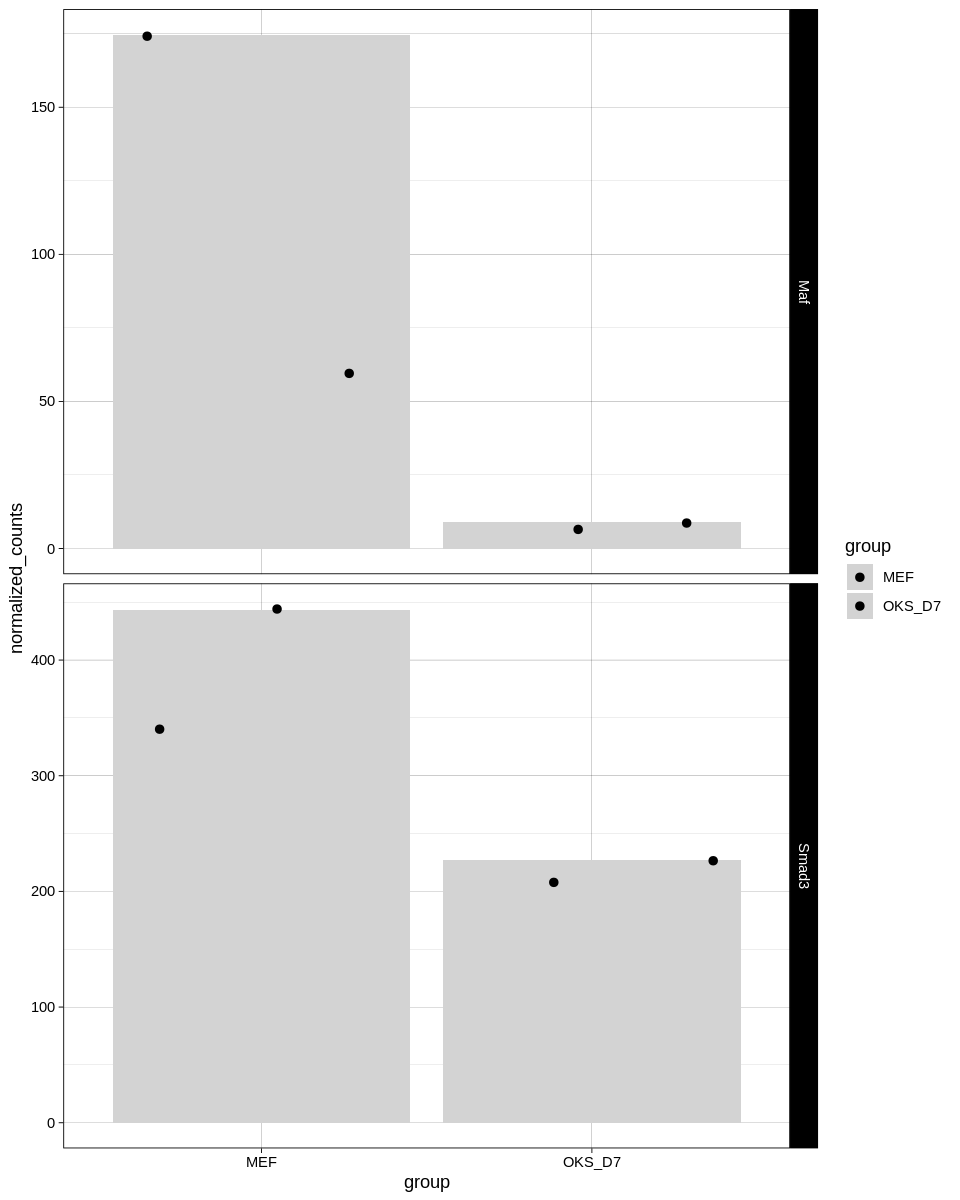

In [63]:
options(repr.plot.width = 8, repr.plot.height = 10)
df_genes %>%
  ggplot(aes(group, normalized_counts, fill = group)) +
  geom_bar(stat = 'identity', position = 'dodge') +
  geom_jitter(size = 2) + 
  scale_fill_manual(values = c('lightgrey','lightgrey')) +
  facet_grid(genes ~ ., scales = 'free') + 
  theme_linedraw()


In [66]:
res[res$SYMBOL %in% c('Maf','Smad3'),]

log2 fold change (MLE): group OKS_D7 vs MEF 
Wald test p-value: group OKS_D7 vs MEF 
DataFrame with 2 rows and 7 columns
   baseMean log2FoldChange     lfcSE      stat      pvalue        padj
  <numeric>      <numeric> <numeric> <numeric>   <numeric>   <numeric>
1   34.2625      -3.986266  0.662245  -6.01932 1.75154e-09 2.27124e-08
2  279.9890      -0.850028  0.152551  -5.57210 2.51692e-08 2.75121e-07
       SYMBOL
  <character>
1         Maf
2       Smad3

In [64]:
sessionInfo()

R version 4.1.3 (2022-03-10)
Platform: x86_64-pc-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS:   /usr/lib/x86_64-linux-gnu/openblas/libblas.so.3
LAPACK: /usr/lib/x86_64-linux-gnu/libopenblasp-r0.2.20.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats4    parallel  stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] data.table_1.14.2                        
 [2] BSgenome.Mmusculus.UCSC.mm10_1.4.3       
 [3] BSgenome_1.62.0                          
 [4] rtracklayer_1.54.0                       
 [5] Biostrings_2.62.0                        
 [6] XVecto

In [65]:
Sys.time() - start_time0

Time difference of 36.85204 mins